# Churn analysis for Telco Data

- Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option("display.max_columns",100) #to see the values of all the columns available,
#as they get compressed because pandas shows only 20 columns when we do data.head()

- Importing the data

In [3]:
telco_base_data=pd.read_csv(r'C:\Users\Administrator\OneDrive\Desktop\Data Science\Project\ML_project3_Churn\Telco_customer_churn.csv')

- Studying and analysing the data

In [4]:
telco_base_data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
telco_base_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
telco_base_data.shape

(7043, 21)

In [7]:
telco_base_data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


### Findings

from studying the above data we can say that 
- average tenure for the customers is 32 months
- average monthly charges are $64.76 

In [8]:
telco_base_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
# To know the blank values we need to confirm all the data present is in correct data type format

In [10]:
telco_base_data["Churn"].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [11]:
100*telco_base_data["Churn"].value_counts()/len(telco_base_data["Churn"])

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

<AxesSubplot:>

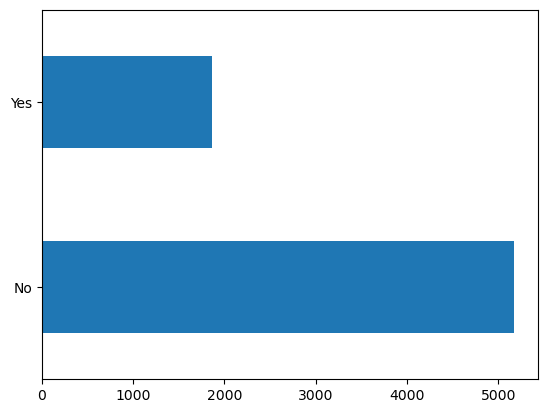

In [12]:
telco_base_data["Churn"].value_counts().plot(kind="barh")

- Here in above bar graph we can see that the data is heavily biased towards No's. 73% of the data to be precise

- here it seems like there is no null value but actually null values are present in the data
- we were unable to find them because the totalcharges column was supposed to be in int or float format but it's currently in object format
- We have to convert it into float format

## Data cleaning

In [45]:
telco_base_data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [46]:
telco_data = telco_base_data.copy()

In [47]:
telco_data["TotalCharges"]=pd.to_numeric(telco_data["TotalCharges"],errors='coerce')

In [48]:
telco_data["TotalCharges"].dtypes

dtype('float64')

In [49]:
telco_data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

- Now we can see there are 11 null values in totalcharges column
- We need to see what are those values

In [50]:
 telco_data.loc[telco_data["TotalCharges"].isnull()==True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


- We can see all the values are NaN values,so we either replace them or delete them

In [51]:
telco_data["TotalCharges"]=telco_data["TotalCharges"].fillna(telco_data["TotalCharges"].mean())

In [52]:
telco_data["TotalCharges"].isnull().sum()

0

In [53]:
telco_data.sample(10) # for random values

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3067,7005-CCBKV,Male,0,No,No,6,Yes,No,Fiber optic,No,Yes,No,No,No,Yes,Month-to-month,Yes,Electronic check,84.40,556.35,Yes
4507,7797-EJMDP,Female,0,No,No,8,Yes,No,DSL,Yes,No,No,Yes,No,Yes,Month-to-month,No,Bank transfer (automatic),66.05,574.50,No
3703,9483-GCPWE,Male,0,No,Yes,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.10,190.25,No
6203,1090-PYKCI,Female,0,Yes,Yes,69,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,No,One year,Yes,Credit card (automatic),105.10,7234.80,No
1437,1666-JZPZT,Male,0,No,No,27,Yes,Yes,DSL,No,No,No,No,No,No,Month-to-month,No,Mailed check,49.00,1291.35,No
1481,9242-TKFSV,Male,0,Yes,Yes,72,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),65.10,4754.30,No
2492,9206-GVPEQ,Male,0,Yes,No,13,No,No phone service,DSL,Yes,No,No,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,54.45,706.85,Yes
6184,3413-CSSTH,Male,0,No,No,41,Yes,Yes,DSL,No,No,Yes,No,No,No,Month-to-month,Yes,Bank transfer (automatic),55.70,2237.55,No
946,6231-WFGFH,Male,0,Yes,Yes,4,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.50,77.60,No
2960,5590-BYNII,Male,0,No,No,22,Yes,Yes,Fiber optic,Yes,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,100.75,2095.00,Yes


In [54]:
telco_data["tenure"].unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26,  0, 39], dtype=int64)

In [55]:
max(telco_data["tenure"].unique())

72

In [56]:
telco_data["tenure_group"]=pd.cut(telco_data["tenure"],bins=[0,10,20,30,40,50,60,72])

In [57]:
labels=["{0} - {1}".format(i,i+11)for i in range(1,72,12)]
telco_data["tenure_group"]=pd.cut(telco_data.tenure,range(1,80,12),right=False,labels=labels)

In [58]:
telco_data["tenure_group"].value_counts()

1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: tenure_group, dtype: int64

In [59]:
telco_data.drop(columns=["customerID","tenure"],axis=1,inplace=True)

In [60]:
telco_data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


## EDA

In [140]:
new_df=telco_data.loc[telco_data["SeniorCitizen"]==1]

<AxesSubplot:xlabel='Churn', ylabel='count'>

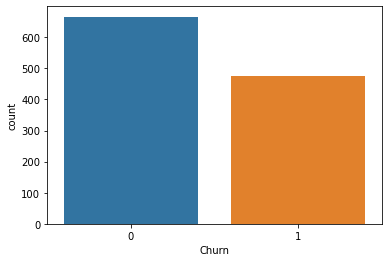

In [143]:
sns.countplot(data=new_df,x='Churn')

In [154]:
len(new_df.loc[new_df["Churn"]==1])/len(new_df.Churn)

0.4168126094570928

<AxesSubplot:xlabel='tenure_group', ylabel='count'>

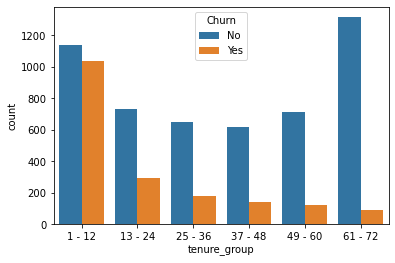

In [61]:
sns.countplot(data=telco_data,x="tenure_group",hue='Churn') # we can create separetely or also

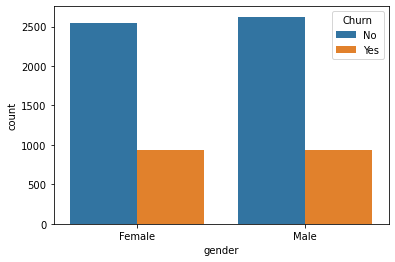

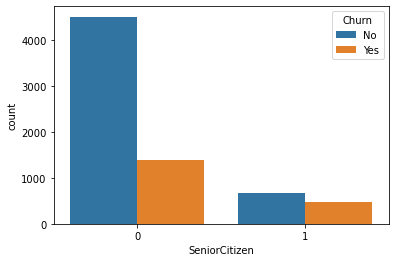

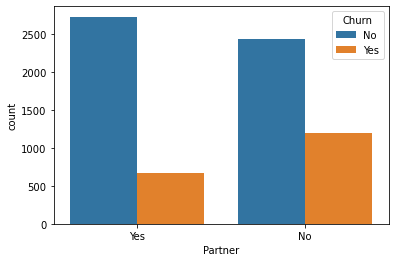

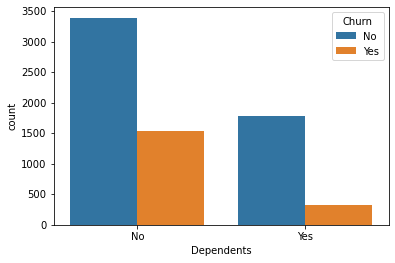

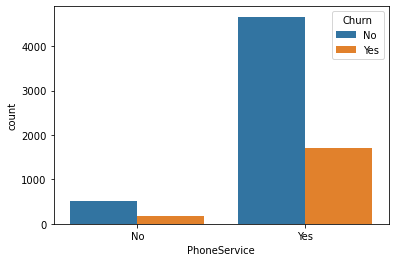

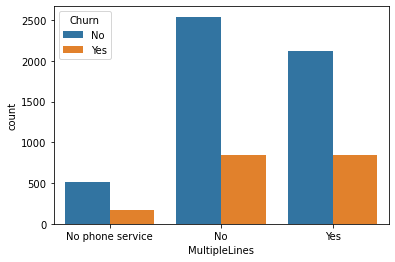

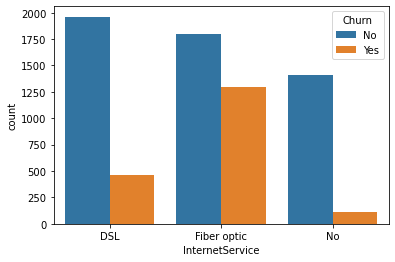

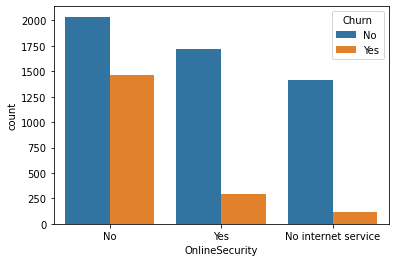

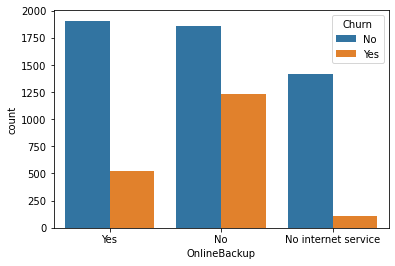

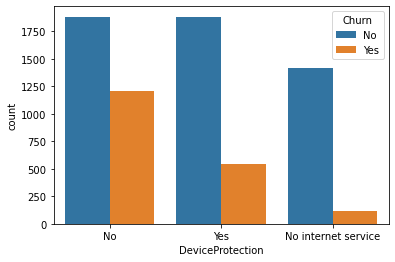

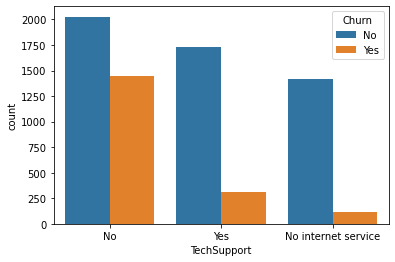

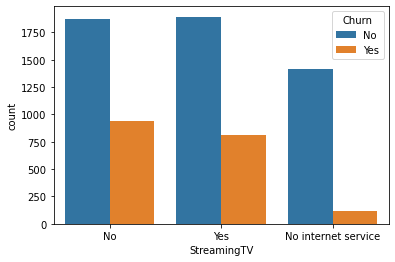

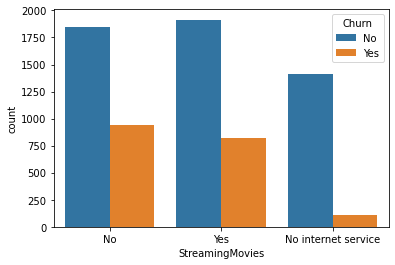

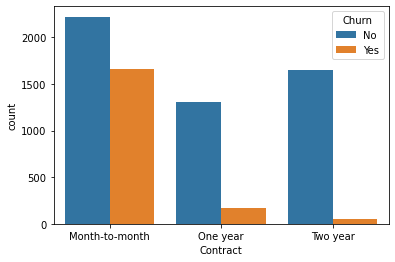

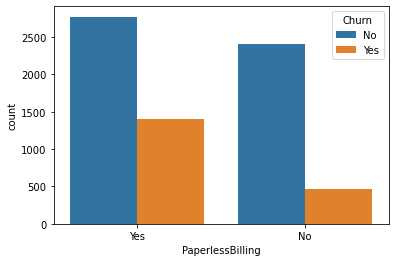

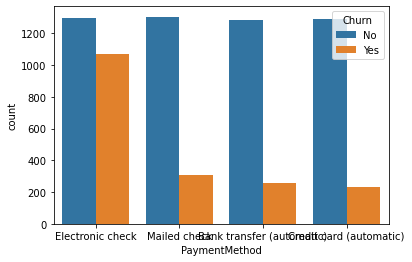

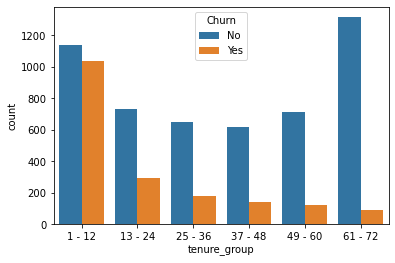

In [62]:
# we can create all at once
for i, predictor in enumerate(telco_data.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=telco_data, x=predictor, hue='Churn')

- Ratio of male and females to churn are almost same
- The customers who have tenure between 1-12 months are more likely to churn
- Only 1142 people are senior citizen out of 7043, which means only 16% senior citizens subscribe, Out of which 41.6% would churn
- People those who have no partner arre more likely to churn
- Similarly people those who have no dependents are more likely to churn, but also they are the ones to subscribe more than those who have dependents
- People those are signed up for fibre optics service are more likely to churn
- People who are not signed up for online security are more likely to churn
- People who are not signed up for online backup are more likely to churn
- People who are not signed up for device protection are more likely to churn
- People who are not signed up for Tech support are more likely to churn
- People who are not signed up for streaming TV are more likely to churn
- People who have month to month subscription are most likely to churn
- People who have paperless billing are more likely to churn
- People who pay by electronic cheque are more likely to churn


In [63]:
# For understanding purpose of system we need to convert datatype of churn column from object to int
#  by converting yes and nos into ones and zero

In [64]:
telco_data.Churn.replace({"No":0,"Yes":1},inplace=True)

In [65]:
telco_data.Churn.sample(5)

5255    0
1661    0
6928    0
620     0
6655    0
Name: Churn, dtype: int64

In [66]:
telco_data_dummies =pd.get_dummies(telco_data)
telco_data_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0


#### To build correlation of all predictors with churn

<AxesSubplot:>

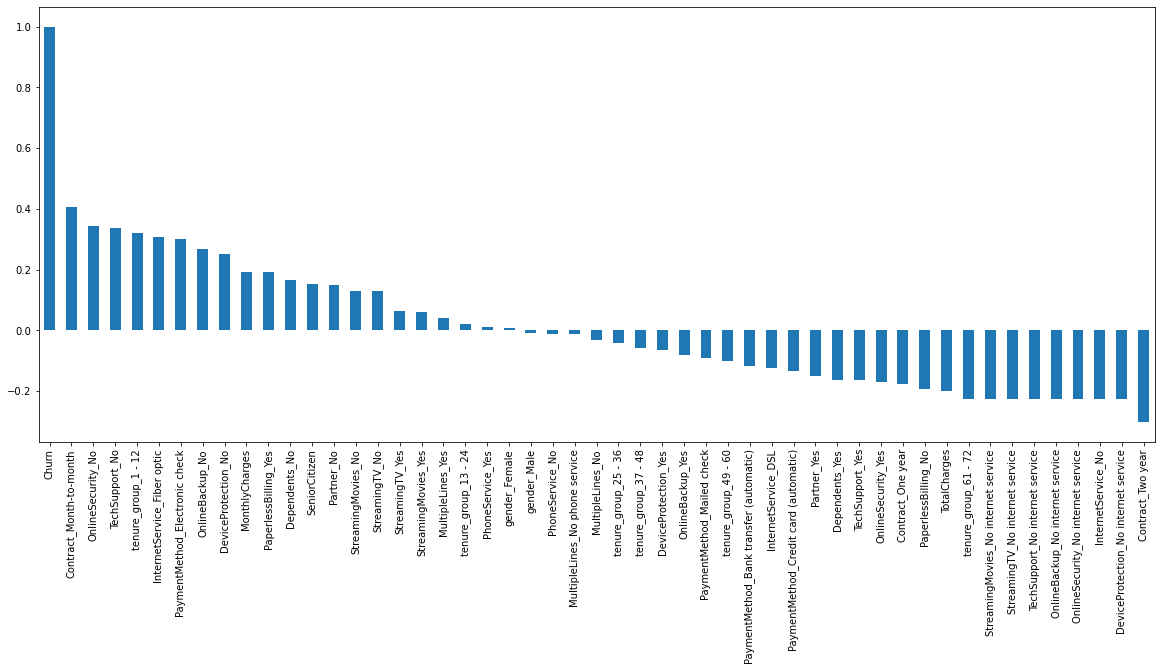

In [155]:
plt.figure(figsize=(20,8))
telco_data_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

- Above data represents to correlation of other features to Churn, gives the same insights that are mentioned earlier like

#### High Churn - 
- Month to Month contact
- Not opted for services like Online security, Tech support etc.

####  Low Churn -

- Two year contract
- Devices with no internet service

- Factors like Gender have almost no impact on Churn

### CONCLUSION
- These are some of the quick insights from this exercise:

- Electronic check medium are the highest churners
- Contract Type - Monthly customers are more likely to churn because of no contract terms, as they are free to go customers.
- No Online security, No Tech Support category are high churners
- Non senior Citizens are high churners

In [156]:
telco_data_dummies.to_csv('tel_churn.csv')